In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline




In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#loading the data
mining_data = pd.read_csv('/content/drive/MyDrive/MiningProcess_Flotation_Plant_Database.csv',decimal=',')

In [12]:
# dataset overview
mining_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

# Dataset description:
1. % Iron Feed:
% of Iron that comes from the iron ore that is being fed into the flotation cells
2. % Silica Feed:
% of silica (impurity) that comes from the iron ore that is being fed into the flotation cells
3. Starch Flow:
Starch (reagent) Flow measured in m3/h
4.Amina Flow:
Amina (reagent) Flow measured in m3/h
5.Ore Pulp Flow:
t/h
6.Ore Pulp pH:
pH scale from 0 to 14
7.Ore Pulp Density:
Density scale from 1 to 3 kg/cm³
8.Flotation Column 01 Air Flow:
Air flow that goes into the flotation cell measured in Nm³/h
9.Flotation Column 02 Air Flow:
Air flow that goes into the flotation cell measured in Nm³/h

In [13]:
mining_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [14]:
  #statistical overview of dataset
  # mining_data.drop('date',axis=1,inplace=True)
  mining_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,737453.0,56.294739,5.157744,42.740000,52.670000,56.080000,59.720000,65.78000
% Silica Feed,737453.0,14.651716,6.807439,1.310000,8.940000,13.850000,19.600000,33.40000
Starch Flow,737453.0,2869.140569,1215.203734,0.002026,2076.320000,3018.430000,3727.730000,6300.23000
Amina Flow,737453.0,488.144697,91.230534,241.669000,431.796000,504.393000,553.257000,739.53800
Ore Pulp Flow,737453.0,397.578372,9.699785,376.249000,394.264000,399.249000,402.968000,418.64100
Ore Pulp pH,737453.0,9.767639,0.387007,8.753340,9.527360,9.798100,10.038000,10.80810
Ore Pulp Density,737453.0,1.680380,0.069249,1.519820,1.647310,1.697600,1.728330,1.85325
Flotation Column 01 Air Flow,737453.0,280.151856,29.621288,175.510000,250.281000,299.344000,300.149000,373.87100
Flotation Column 02 Air Flow,737453.0,277.159965,30.149357,175.156000,250.457000,296.223000,300.690000,375.99200
Flotation Column 03 Air Flow,737453.0,281.082397,28.558268,176.469000,250.855000,298.696000,300.382000,364.34600


In [15]:
#finding missing values
mining_data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64



*   Multi colinearity check
*   Is the variables are highly correlated?
*   Noise reduction(random variability)----plotting time series data
*   List item





## Correlation analysis

<ipython-input-16-360b29bb3a54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = mining_data.corr()


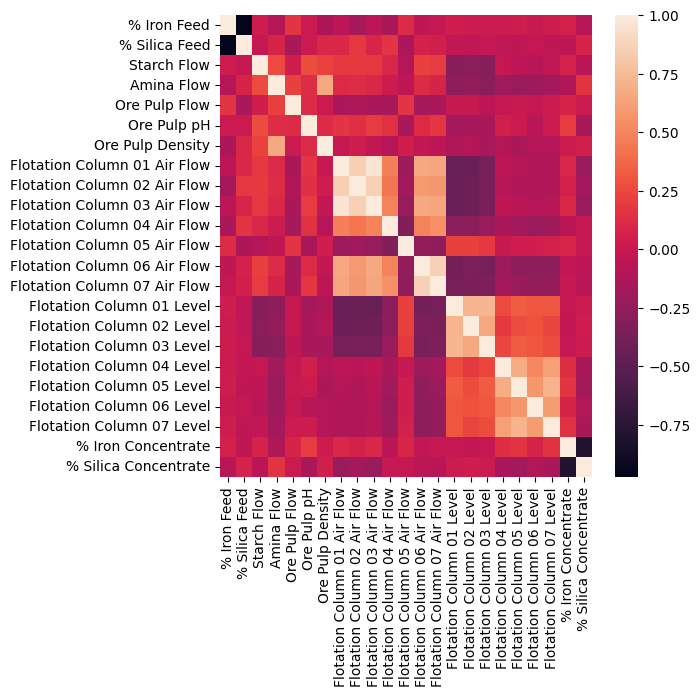

In [16]:
#correlation matrix
data_corr = mining_data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data_corr)
plt.show()

In [17]:
#filtering highly correlated features
cutoff = 0.8  # Adjust the threshold value as per your requirement

# Find highly correlated features
correlated_columns = {}

# Find highly correlated features
for i in range(len(data_corr.columns)):
    for j in range(i):
        if abs(data_corr.iloc[i, j]) > cutoff:
            colname1 = data_corr.columns[i]
            colname2 = data_corr.columns[j]
            correlated_columns[colname1] = colname2

# Print the dictionary of correlated columns
for colname1, colname2 in correlated_columns.items():
    print(f"{colname1} is correlated with {colname2}")

% Silica Feed is correlated with % Iron Feed
Flotation Column 02 Air Flow is correlated with Flotation Column 01 Air Flow
Flotation Column 03 Air Flow is correlated with Flotation Column 02 Air Flow
Flotation Column 07 Air Flow is correlated with Flotation Column 06 Air Flow
% Silica Concentrate is correlated with % Iron Concentrate


**Checking random variability**

In [18]:
#time series data
mining_data['date'] = pd.to_datetime(mining_data['date'])
mining_data['date'] = pd.to_datetime(mining_data['date']).dt.normalize()

mining_data.set_index('date', inplace=True)


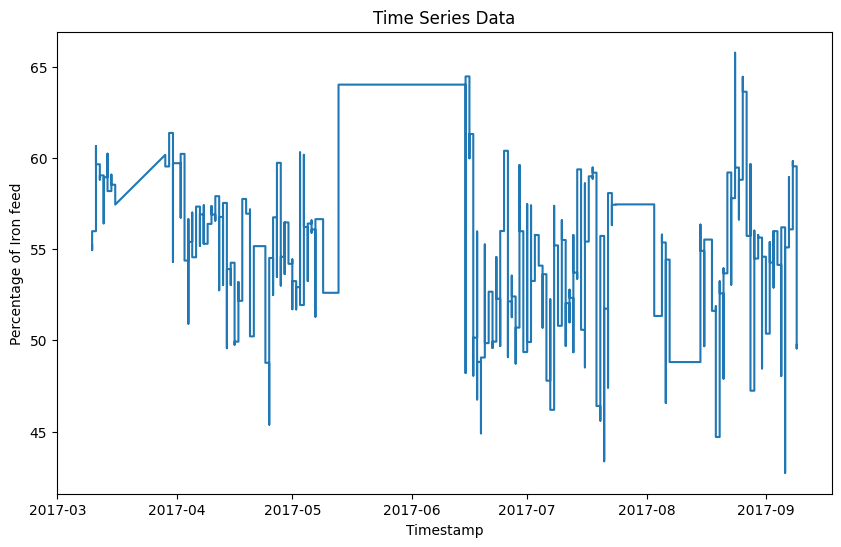

In [19]:
# Plot the time series data for percentage of Iron feed
plt.figure(figsize=(10, 6))
plt.plot(mining_data.index, mining_data['% Iron Feed'])
plt.xlabel('Timestamp')
plt.ylabel('Percentage of Iron feed')
plt.title('Time Series Data')
plt.show()

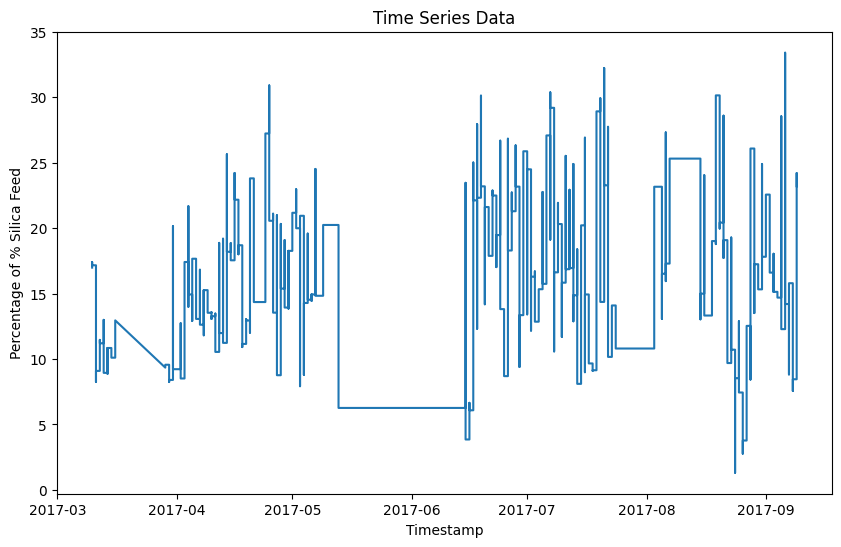

In [20]:
# Plot the time series data for percentage of Iron feed
plt.figure(figsize=(10, 6))
plt.plot(mining_data.index, mining_data['% Silica Feed'])
plt.xlabel('Timestamp')
plt.ylabel('Percentage of % Silica Feed')
plt.title('Time Series Data')
plt.show()

Checking multi colinearity

In [21]:
mining_data=mining_data.reset_index()
mining_data.drop('date',axis=1,inplace=True)
df_corr = mining_data.corr()['% Silica Feed'].abs().sort_values(ascending=False)

features = df_corr[df_corr > 0.6].index.to_list()[1:]
# features

#seperating features and targets
X = mining_data.drop('% Silica Feed',axis=1)
y = mining_data['% Silica Feed']

In [ ]:
features

['% Iron Feed']

There is no multicolinearity for multiple features in the data

## Exploratory Data Analysis

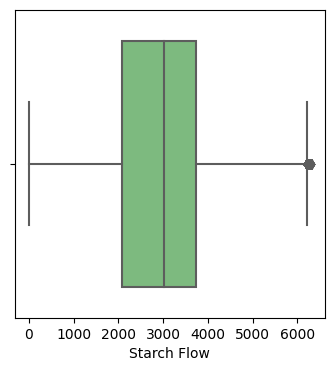

In [22]:
#observing outliers
# sns.set_style("dark")
plt.figure(figsize=(4,4))
sns.boxplot(x=mining_data['Starch Flow'],palette='Greens')
plt.show()

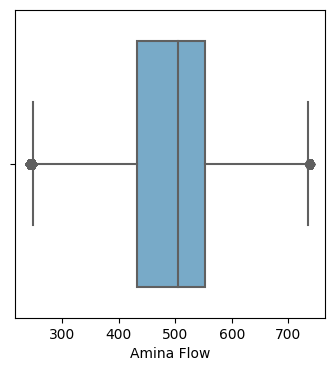

In [27]:
#Amina flow distribution
plt.figure(figsize=(4,4))
sns.boxplot(x=mining_data['Amina Flow'],palette='Blues')
plt.show()

#Baseline models:


In [28]:


#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#making pipeline
pipeline_gb = Pipeline([
    ('preprocessing', StandardScaler()),  # Preprocessing step (e.g., StandardScaler)
    ('gb_regressor',  GradientBoostingRegressor()) , # Regression model (e.g., Gradient boosting regressor)
    ])
pipeline_dt= Pipeline([
    ('preprocessing', StandardScaler()),  # Preprocessing step (e.g., StandardScaler)
     ('DecisionTreeRegressor',DecisionTreeRegressor()) # Regression model (e.g., Gradient boosting regressor)
    ])
pipeline_rf =  Pipeline([
    ('preprocessing', StandardScaler()),  # Preprocessing step (e.g., StandardScaler)
    ('RandomForestRegressor',RandomForestRegressor()) # Regression model (e.g., Gradient boosting regressor)
    ])


In [30]:
# training Gradient boosting algorithm
pipeline_gb.fit(X_train,y_train)
gb_score = pipeline_gb.score(X_test,y_test)
print('gradient boosting score',gb_score)

gradient boosting score 0.9867740167622292


In [31]:
y_train_pred = pipeline_gb.predict(X_train)
y_test_pred = pipeline_gb.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('training mean_squared_error',mse_train)
print('training mean_squared_error',mse_test)


# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('training rmse',rmse_train)
print('training rmse',rmse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('training mae',mae_train)
print('training mae',mae_test)
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('training r2',r2_train)
print('training r2',r2_test)

training mean_squared_error 0.6102557055216965
training mean_squared_error 0.6123783026053291
training rmse 0.7811886491249707
training rmse 0.7825460386490555
training mae 0.5389653962344071
training mae 0.539644377861487
training r2 0.9868361022202743
training r2 0.9867740167622292


In [33]:
gb_predictions = pipeline_gb.predict(X_test)

In [35]:
#training Gradient boosting algorithm
pipeline_dt.fit(X_train,y_train)
dt_score = pipeline_dt.score(X_test,y_test)
print('Decision tree score',dt_score)

Decision tree score 0.9999088931902197


In [36]:
dt_predictions = pipeline_dt.predict(X_test)

In [37]:
#training Gradient boosting algorithm
pipeline_rf.fit(X_train,y_train)
rf_score = pipeline_rf.score(X_test,y_test)
print('Random Forest  score',dt_score)

Random Forest  score 0.9999088931902197


In [38]:
rf_predictions = pipeline_rf.predict(X_test)

In [39]:

# # Create the scatter plot
# plt.scatter(predictions, y_test, alpha=0.5)

# # Customize the plot
# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')
# plt.title('Scatter Plot: Predicted vs Actual Values')
# plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], color='red')  # Add a diagonal line
# plt.show()

In [40]:
# # Calculate the residuals
# residuals = y_test - predictions

# plt.scatter(predictions, residuals, color='blue', alpha=0.5, label='Residuals')
# plt.scatter(predictions, y_test, color='red', alpha=0.5, label='Actual Values')

# # Customize the plot
# plt.xlabel('Predicted Values')
# plt.ylabel('Values')
# plt.title('Residual Plot')
# plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
# plt.legend()
# plt.show()

## Principal Component Analysis(PCA)

In [41]:
#standardizing the data
X_std = StandardScaler().fit_transform(X)

In [42]:
#Applying PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_std)

PCA()

In [43]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[27.1216844  13.75555496  9.28429676  7.53512239  5.70599175  5.0795343
  4.84952903  3.9601345   3.43306152  3.00363807  2.63711906  2.36097777
  2.21571911  1.6376898   1.5003366   1.30852883  1.18808808  1.08990868
  0.81270381  0.73113598  0.59425598  0.19498861]



In [44]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 27.1216844   40.87723935  50.16153611  57.69665851  63.40265026
  68.48218456  73.33171359  77.29184809  80.7249096   83.72854768
  86.36566673  88.7266445   90.94236361  92.58005341  94.08039001
  95.38891884  96.57700693  97.66691561  98.47961943  99.21075541
  99.80501139 100.        ]



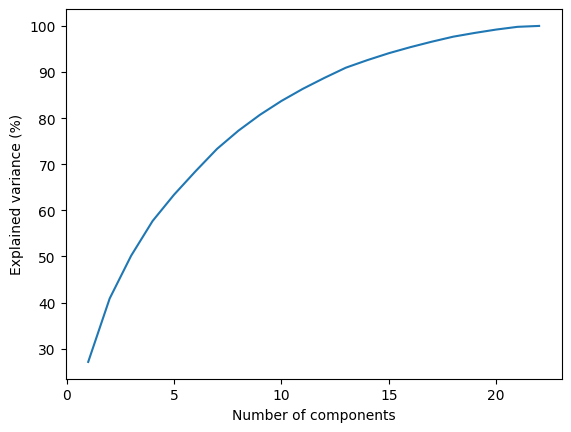

In [45]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

Cumulative Variances (Percentage):
[27.1216844  40.87723935 50.16153611 57.69665851 63.40265026 68.48218456
 73.33171359 77.29184809 80.7249096  83.72854768 86.36566673]
Number of components: 11


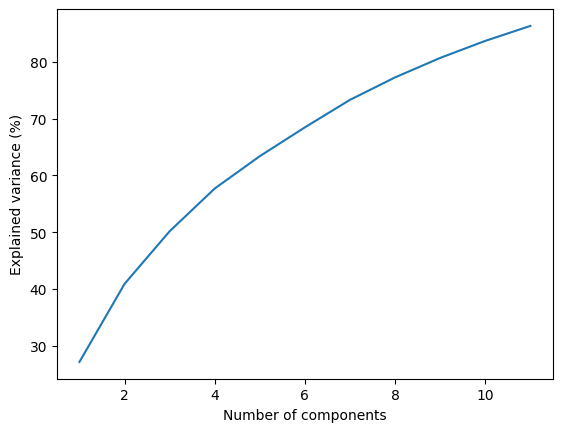

In [46]:
pca = PCA(n_components = 0.85)
pca.fit(X_std)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [47]:
print('Top 4 most important features in each component')
print('===============================================')
pca_components = abs(pca.components_)
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {mining_data.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Ore Pulp Density', 'Flotation Column 02 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow']
Component 1: ['Flotation Column 04 Level', 'Flotation Column 03 Level', 'Flotation Column 06 Level', 'Flotation Column 05 Level']
Component 2: ['Ore Pulp pH', 'Starch Flow', 'Flotation Column 07 Level', '% Silica Feed']
Component 3: ['Flotation Column 07 Level', '% Iron Concentrate', 'Starch Flow', 'Ore Pulp pH']
Component 4: ['Ore Pulp pH', '% Iron Feed', 'Flotation Column 01 Level', 'Flotation Column 02 Level']
Component 5: ['Flotation Column 04 Air Flow', '% Iron Feed', 'Amina Flow', 'Ore Pulp Density']
Component 6: ['Ore Pulp Flow', 'Flotation Column 04 Air Flow', '% Silica Feed', 'Flotation Column 03 Air Flow']
Component 7: ['Amina Flow', '% Iron Feed', '% Silica Feed', 'Ore Pulp Flow']
Component 8: ['Flotation Column 04 Air Flow', '% Silica Feed', '% Iron Feed', 'Starch Flow']
Component 9: ['Ore Pulp Flow

In [48]:
X_pca = pca.transform(X_std)
print(X_pca.shape)


(737453, 11)


## Machine learning model with PCA

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [50]:
X_train = pca.transform(X_train)
X_test = pca.transform (X_test)

In [52]:
#gradient boosting algorithm
gb_regress_model = GradientBoostingRegressor()
gb_regress_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [53]:
gb_regress_model.score(X_test,y_test)


0.913773298630462

In [54]:
y_train_pred =gb_regress_model.predict(X_train)
y_test_pred = gb_regress_model.predict(X_test)


In [55]:
y_train.shape,y_train_pred.shape

((516217,), (516217,))

In [56]:

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('training mean_squared_error',mse_train)
print('testing mean_squared_error',mse_test)


# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('training rmse',rmse_train)
print('testing rmse',rmse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('training mae',mae_train)
print('testing mae',mae_test)
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('training r2',r2_train)
print('testing r2',r2_test)

training mean_squared_error 3.9277117278708706
testing mean_squared_error 3.9923958827603983
training rmse 1.9818455358253506
testing rmse 1.9980980663521994
training mae 1.5426966572473375
testing mae 1.5543172418132722
training r2 0.9152748671973148
testing r2 0.913773298630462


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


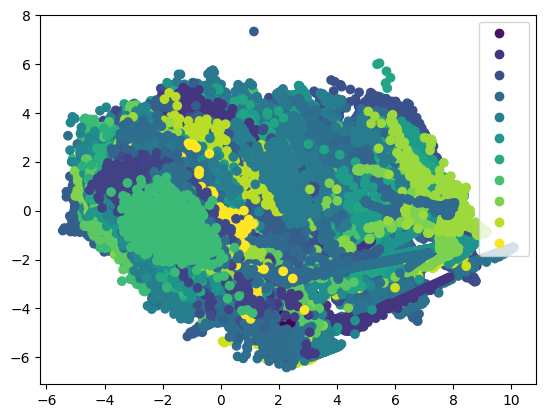

In [57]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0])
plt.show()

In [58]:
dt_regressor2 = DecisionTreeRegressor()
dt_regressor2.fit(X_train,y_train)
y_train_pred =dt_regressor2.predict(X_train)
y_test_pred = dt_regressor2.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('training mean_squared_error',mse_train)
print('testing mean_squared_error',mse_test)


# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('training rmse',rmse_train)
print('testing rmse',rmse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('training mae',mae_train)
print('testing mae',mae_test)
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('training r2',r2_train)
print('testing r2',r2_test)


training mean_squared_error 5.085197832878688e-27
testing mean_squared_error 2.441724628903071
training rmse 7.131057307916328e-14
testing rmse 1.562601877927667
training mae 2.754352957107962e-14
testing mae 0.5114654034605849
training r2 1.0
testing r2 0.947264282755071


In [59]:
rf_regressor2 = RandomForestRegressor()
rf_regressor2.fit(X_train,y_train)
y_train_pred =rf_regressor2.predict(X_train)
y_test_pred = rf_regressor2.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('training mean_squared_error',mse_train)
print('testing mean_squared_error',mse_test)


# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('training rmse',rmse_train)
print('testing rmse',rmse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('training mae',mae_train)
print('testing mae',mae_test)
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('training r2',r2_train)
print('testing r2',r2_test)

training mean_squared_error 0.10891828083404846
testing mean_squared_error 0.7670073338097324
training rmse 0.330027697071092
testing rmse 0.8757895488128027
training mae 0.1641416634864911
testing mae 0.43704762380445383
training r2 0.9976505109214552
testing r2 0.9834343801910421
